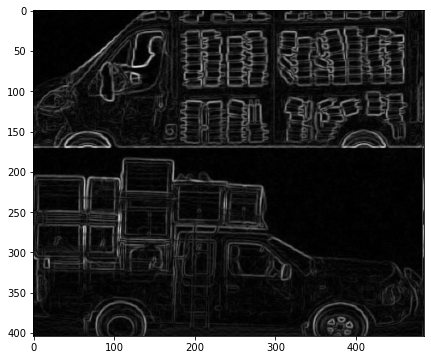

In [12]:

import imageio
import matplotlib.pyplot as plt
import numpy as np
# Project modules
from filters import filter_appliers as f
from filters import helpers as hp

filename = 'border_vehicles.png' #str(input())
img = imageio.imread('demo/img/' + filename)

# Handling third dimension of some images
img = img[:, :, 0] if (len(np.shape(img)) == 3) else img

# Applying filters to the image
img_out = f.smoothing_filter(img, n=5, sigma=0.5, selected=1)
img_out = f.edge_filter(img, selected=1)
img_out = hp.normalize(img_out)

hp.printImg(img_out)
